In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.simplefilter("ignore")

In [47]:
df=pd.read_csv("C:/Bharath/MLOps/MLOps - MLFLow,Jenkins,GCP/artifacts/raw/train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,29580,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,6325,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,33899,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,720,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,22120,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            25392 non-null  int64  
 1   Booking_ID                            25392 non-null  object 
 2   no_of_adults                          25392 non-null  int64  
 3   no_of_children                        25392 non-null  int64  
 4   no_of_weekend_nights                  25392 non-null  int64  
 5   no_of_week_nights                     25392 non-null  int64  
 6   type_of_meal_plan                     25392 non-null  object 
 7   required_car_parking_space            25392 non-null  int64  
 8   room_type_reserved                    25392 non-null  object 
 9   lead_time                             25392 non-null  int64  
 10  arrival_year                          25392 non-null  int64  
 11  arrival_month  

In [49]:
df.drop(['Unnamed: 0',"Booking_ID"],axis=1,inplace=True)

In [50]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.shape

(25392, 18)

In [51]:
df.duplicated().sum()

np.int64(6419)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(18973, 18)

In [54]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [55]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    13493
Canceled         5480
Name: count, dtype: int64

In [56]:
cat_cols = [cols for cols in df.columns if df[cols].dtype == "O"]
num_cols = [cols for cols in df.columns if df[cols].dtype != "O"]

In [18]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [19]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
###DATA ANALYSIS - Univariate plots

In [57]:
def numplot(df,num_cols):
    fig , axes = plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*5))
    if len(num_cols)==1:
        axes=[axes]

    for ind,name in enumerate(num_cols):
        sns.histplot(df,x=name,ax=axes[ind][0],kde=True,palette="Blues")
        axes[ind][0].set_title(f"Hist for {name}")

        sns.boxplot(df,x=name,ax=axes[ind][1])
        axes[ind][1].set_title(f"Boxplot for {name}")

    plt.show()


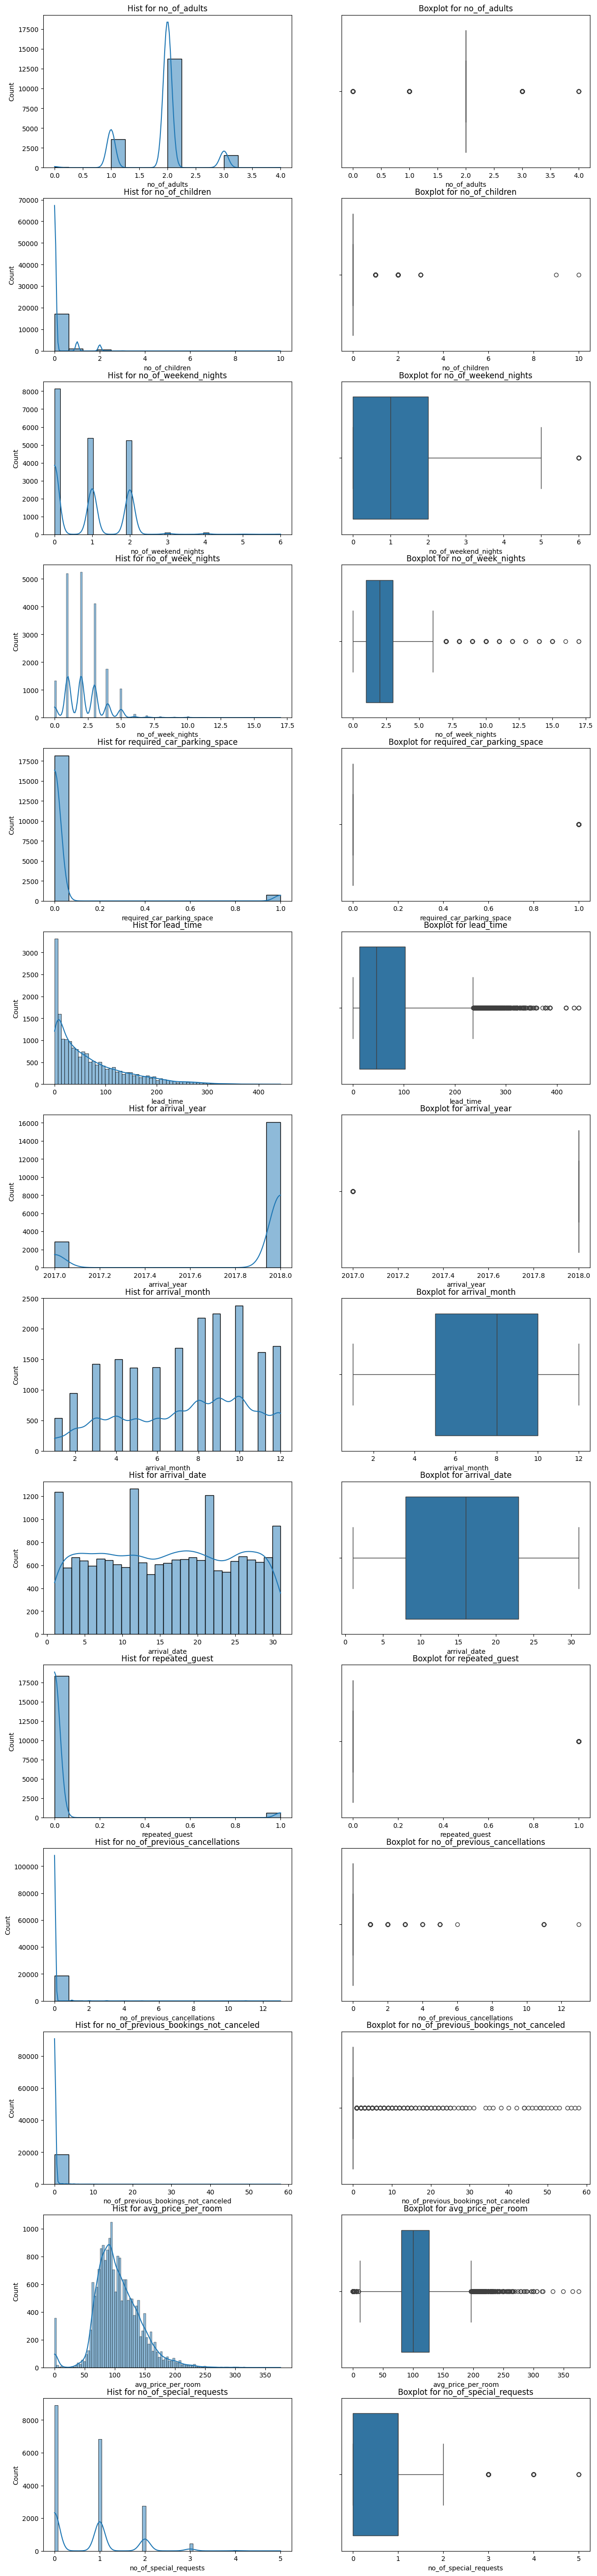

In [22]:
numplot(df,num_cols)

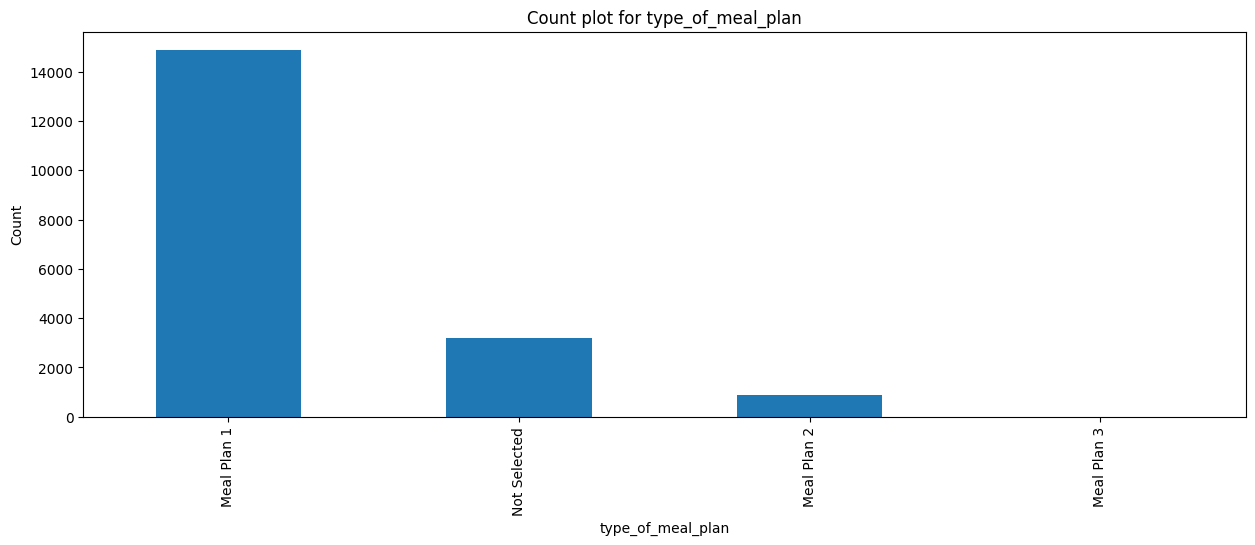

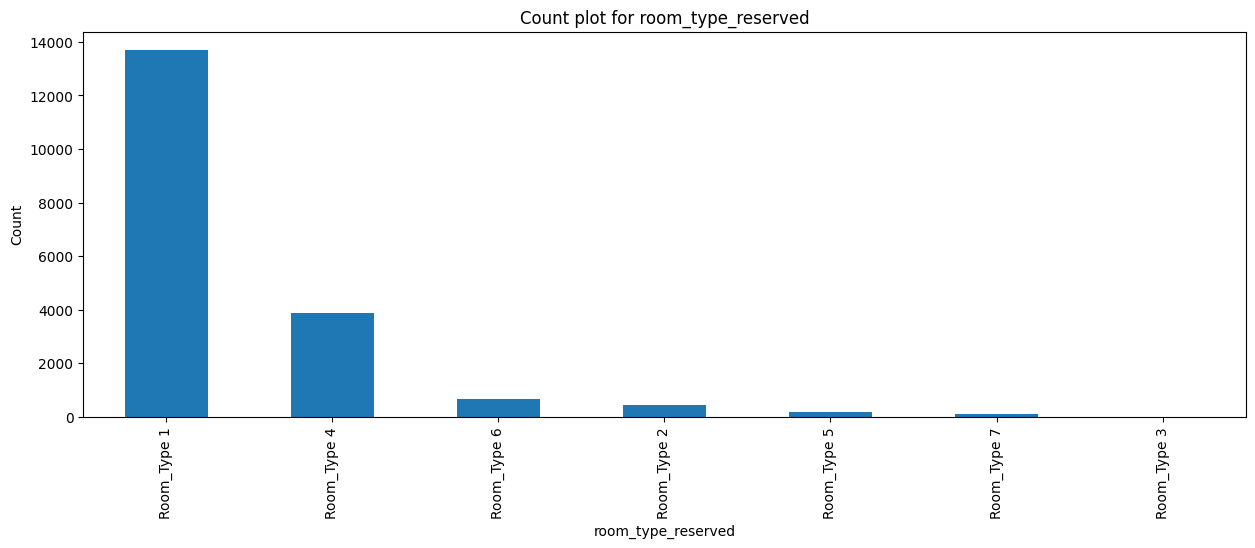

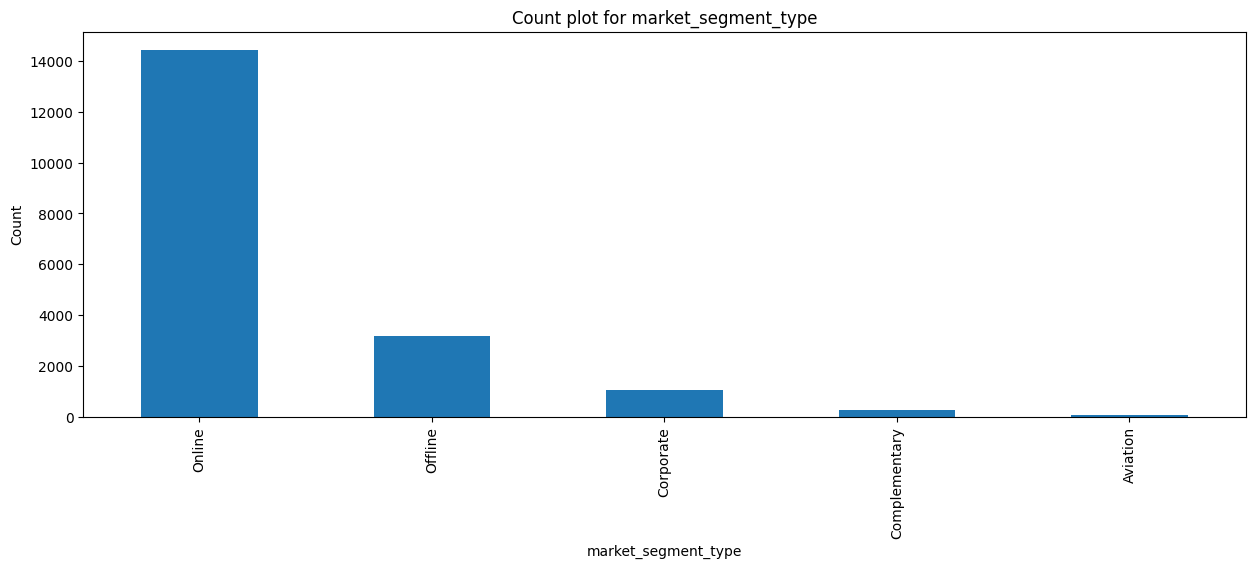

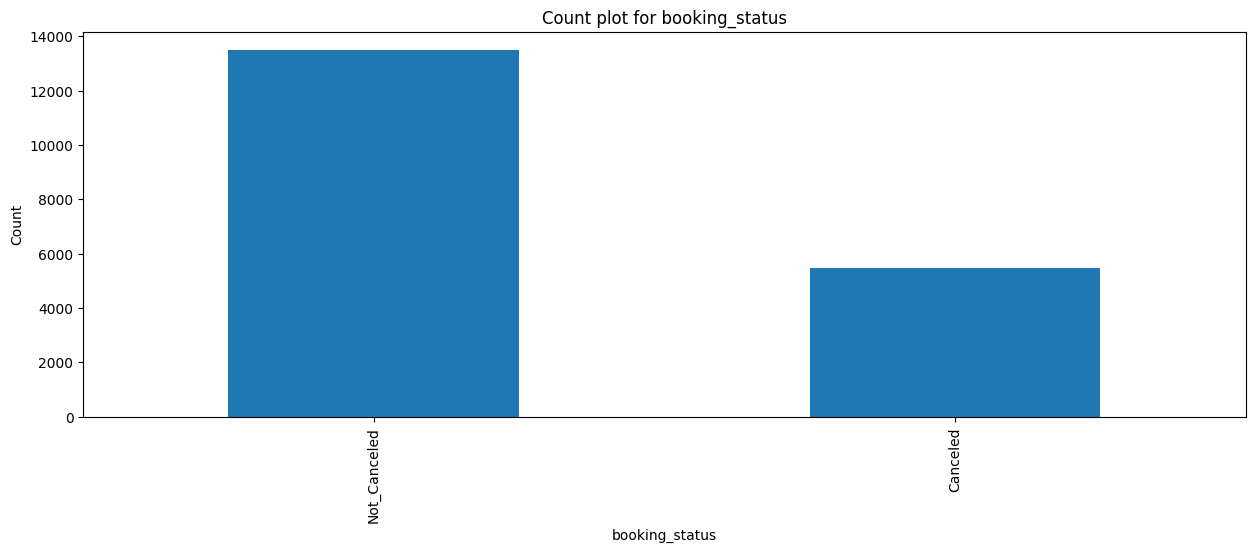

In [23]:
for catcols in cat_cols:
    plt.figure(figsize=(15,5))
    df[catcols].value_counts().plot(kind='bar')
    plt.title(f"Count plot for {catcols}")
    plt.xlabel(catcols)
    plt.ylabel("Count")
    plt.show()

In [34]:
def bivariate_analysis(df,targetcol,numericalcols):
    num_plots = len(numericalcols)
    num_rows = (num_plots + 1)//2

    fig , axes = plt.subplots(num_rows, 2 , figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i,col in enumerate(numericalcols):
        sns.boxplot(data=df,x=targetcol,y=col,ax=axes[i])
        axes[i].set_title(f"{targetcol}   V   {col}")

    plt.tight_layout()
    plt.show()

def bivariate_categs(df,target,cat_cols):
    cat_plots = len(cat_cols)
    num_rows = (cat_plots + 1)//2

    fig , axes = plt.subplots(num_rows, 2 , figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i,col in enumerate(cat_cols):
        sns.countplot(data=df,x=col,hue=target,ax=axes[i])
        axes[i].set_title(f"{target}   V   {col}")

    plt.tight_layout()
    plt.show()
    

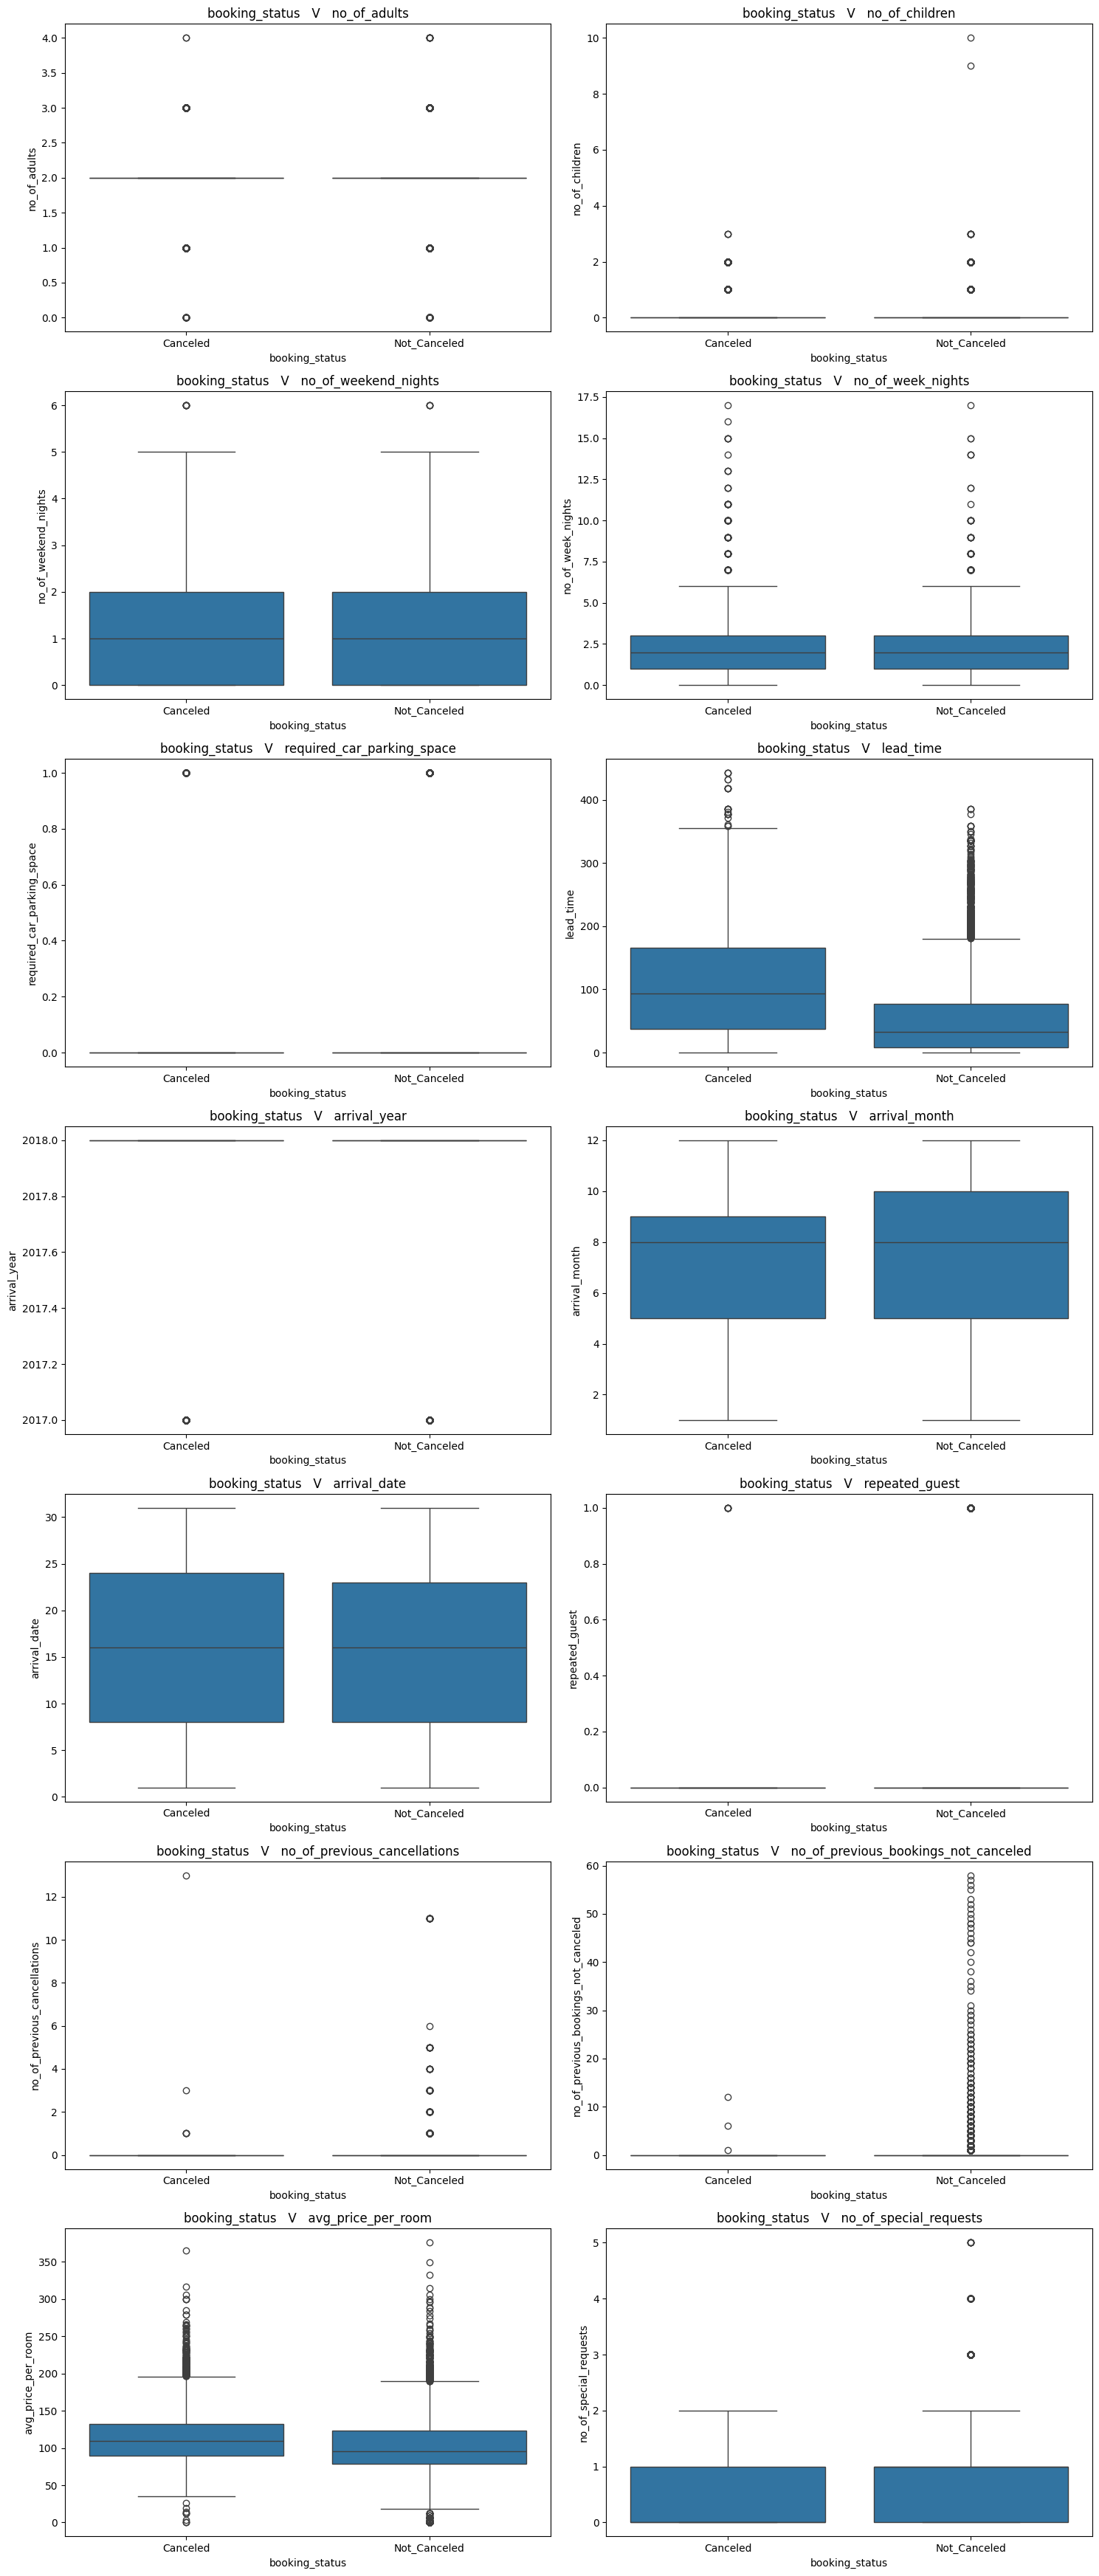

In [58]:
bivariate_analysis(df,"booking_status",num_cols)

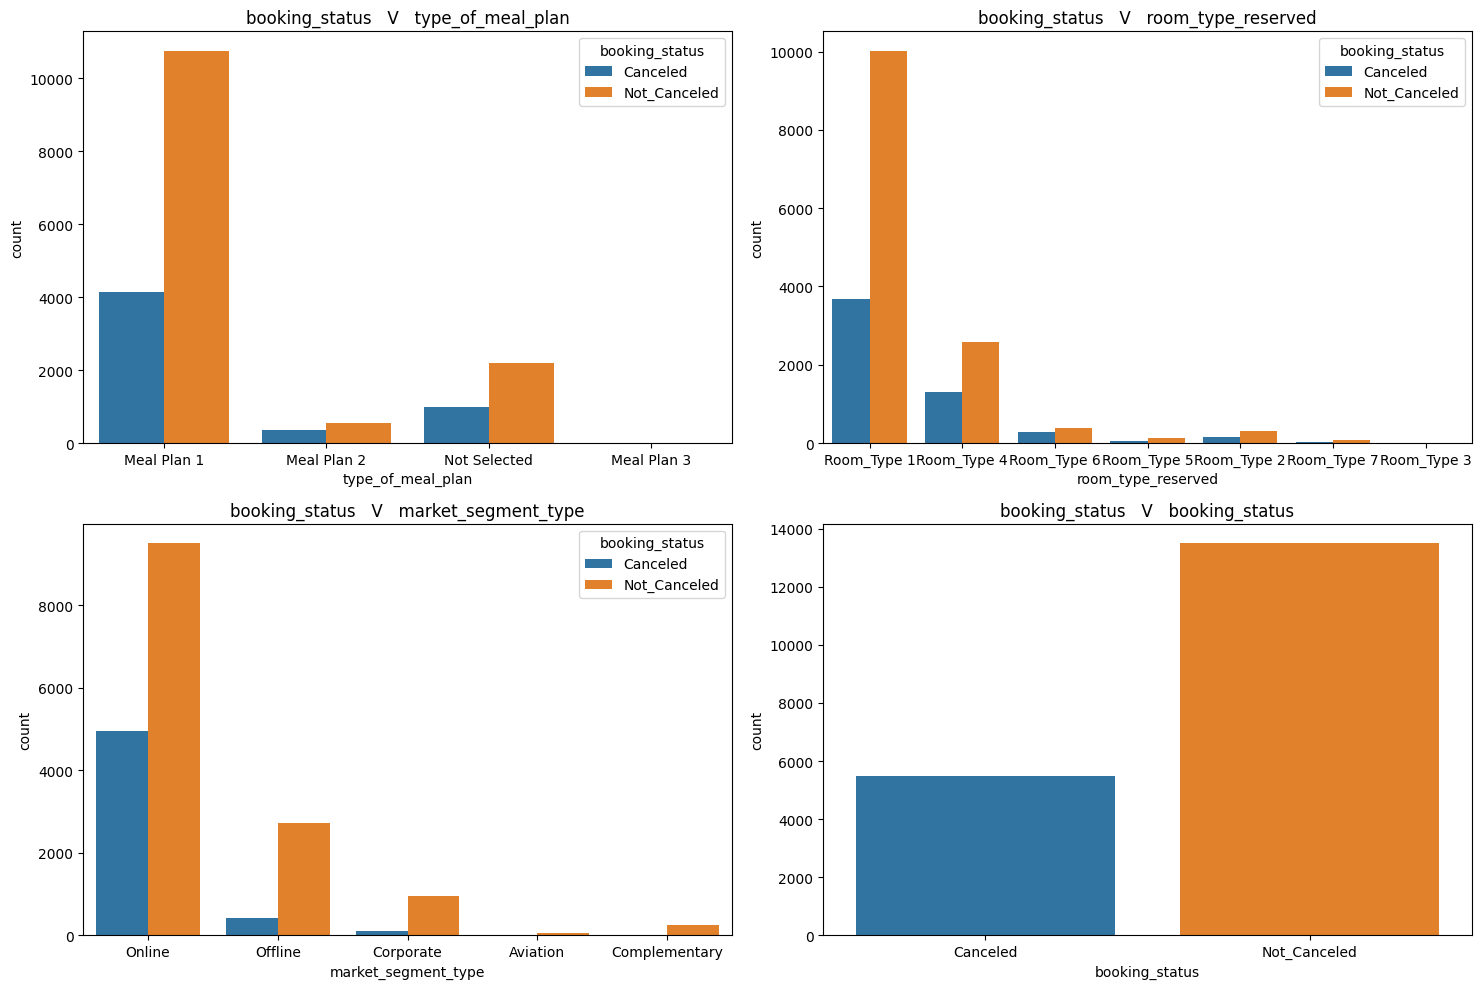

In [59]:
bivariate_categs(df,"booking_status",cat_cols)

## DATA PREPROCESSING

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
lemapping = {}

for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])
    lemapping[cols] = {label:code for label,code in zip(le.classes_,le.transform(le.classes_))}

In [61]:
lemapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [43]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [45]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,0,200,2018,8,29,4,0,0,0,90.95,0,0
1,2,0,1,3,0,0,0,79,2018,3,24,4,0,0,0,90.95,1,0
2,2,0,1,4,0,0,3,78,2018,4,6,4,0,0,0,99.45,1,1
3,2,0,2,0,0,0,0,61,2017,10,4,3,0,0,0,91.00,0,1
4,2,1,0,4,0,0,0,201,2018,11,1,4,0,0,0,82.28,3,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18973 entries, 0 to 25391
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18973 non-null  int64  
 1   no_of_children                        18973 non-null  int64  
 2   no_of_weekend_nights                  18973 non-null  int64  
 3   no_of_week_nights                     18973 non-null  int64  
 4   type_of_meal_plan                     18973 non-null  int64  
 5   required_car_parking_space            18973 non-null  int64  
 6   room_type_reserved                    18973 non-null  int64  
 7   lead_time                             18973 non-null  int64  
 8   arrival_year                          18973 non-null  int64  
 9   arrival_month                         18973 non-null  int64  
 10  arrival_date                          18973 non-null  int64  
 11  market_segment_type 

In [63]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 871.5 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.9 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.9 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.9 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.9 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 4.3 MB/s eta 0:00:02
   -------- ----------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X=add_constant(df)

In [66]:
X

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,2,0,1,3,0,0,0,200,2018,8,29,4,0,0,0,90.95,0,0
1,1.0,2,0,1,3,0,0,0,79,2018,3,24,4,0,0,0,90.95,1,0
2,1.0,2,0,1,4,0,0,3,78,2018,4,6,4,0,0,0,99.45,1,1
3,1.0,2,0,2,0,0,0,0,61,2017,10,4,3,0,0,0,91.00,0,1
4,1.0,2,1,0,4,0,0,0,201,2018,11,1,4,0,0,0,82.28,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25384,1.0,3,0,0,1,0,0,3,65,2018,6,21,4,0,0,0,132.30,0,0
25385,1.0,2,0,2,3,0,0,0,86,2018,6,17,4,0,0,0,126.90,1,1
25386,1.0,2,0,0,2,0,0,3,0,2018,10,12,4,0,0,0,139.50,1,1
25387,1.0,2,0,2,2,0,0,0,43,2017,12,26,3,0,0,0,55.00,2,1


In [68]:
vif_data = pd.DataFrame()

vif_data["Feats"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data

,Feats,VIF
0,const,4.074059e+07
1,no_of_adults,1.339544e+00
2,no_of_children,1.284956e+00
3,no_of_weekend_nights,1.068835e+00
4,no_of_week_nights,1.118710e+00
5,type_of_meal_plan,1.177230e+00
6,required_car_parking_space,1.033964e+00
7,room_type_reserved,1.541363e+00
8,lead_time,1.403276e+00
9,arrival_year,1.291542e+00


<Axes: >

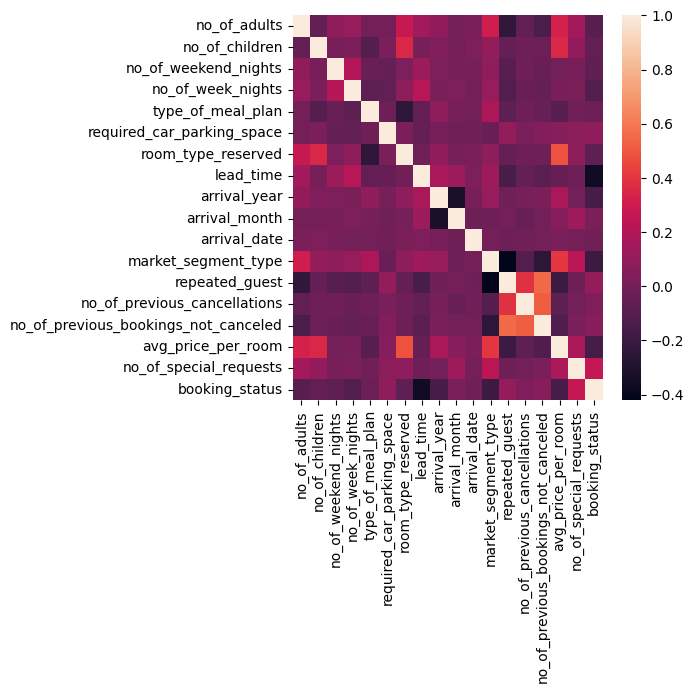

In [72]:
correl=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correl)

In [ ]:
skewness=df.skew()
skewness

no_of_adults                            -0.304395
no_of_children                           4.072963
no_of_weekend_nights                     0.612996
no_of_week_nights                        1.506668
type_of_meal_plan                        1.656324
required_car_parking_space               4.616114
room_type_reserved                       1.400804
lead_time                                1.404721
arrival_year                            -1.935855
arrival_month                           -0.295514
arrival_date                             0.004155
market_segment_type                     -2.313089
repeated_guest                           5.378136
no_of_previous_cancellations            22.073888
no_of_previous_bookings_not_canceled    16.912023
avg_price_per_room                       0.560381
no_of_special_requests                   0.943367
booking_status                          -0.931934
dtype: float64

In [74]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [75]:
skewness=df.skew()
skewness

no_of_adults                            -0.304395
no_of_children                           4.072963
no_of_weekend_nights                     0.612996
no_of_week_nights                        1.506668
type_of_meal_plan                        1.656324
required_car_parking_space               4.616114
room_type_reserved                       1.400804
lead_time                                1.404721
arrival_year                            -1.935855
arrival_month                           -0.295514
arrival_date                             0.004155
market_segment_type                     -2.313089
repeated_guest                           5.378136
no_of_previous_cancellations            13.335657
no_of_previous_bookings_not_canceled     7.766941
avg_price_per_room                       0.560381
no_of_special_requests                   0.943367
booking_status                          -0.931934
dtype: float64

In [76]:
df['booking_status'].value_counts()

booking_status
1    13493
0     5480
Name: count, dtype: int64

In [77]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [78]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 92.2/238.4 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 225.3/238.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [80]:
y_res.value_counts()

booking_status
0    13493
1    13493
Name: count, dtype: int64

In [86]:
X_res.value_counts

<bound method DataFrame.value_counts of        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  3   
1                 2               0                     1                  3   
2                 2               0                     1                  4   
3                 2               0                     2                  0   
4                 2               1                     0                  4   
...             ...             ...                   ...                ...   
26981             2               1                     1                  3   
26982             2               0                     0                  1   
26983             3               0                     2                  1   
26984             2               0                     0                  1   
26985             2               0                     0                  3   


In [83]:
#Create the new dataset post SMOTE from X_res and y_res

bal_df = pd.DataFrame(X_res,columns=X.columns)
bal_df["booking_status"]=y_res

In [85]:
bal_df.shape

(26986, 18)

In [87]:
bal_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,0,200,2018,8,29,4,0.0,0.0,0.0,90.95,0,0
1,2,0,1,3,0,0,0,79,2018,3,24,4,0.0,0.0,0.0,90.95,1,0
2,2,0,1,4,0,0,3,78,2018,4,6,4,0.0,0.0,0.0,99.45,1,1
3,2,0,2,0,0,0,0,61,2017,10,4,3,0.0,0.0,0.0,91.00,0,1
4,2,1,0,4,0,0,0,201,2018,11,1,4,0.0,0.0,0.0,82.28,3,1


In [88]:
df1= bal_df.copy()

In [90]:
from sklearn.ensemble import RandomForestClassifier
X=df1.drop("booking_status",axis=1)
y=df1["booking_status"]

In [91]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [92]:
feature_importance = model.feature_importances_


In [93]:
feature_importance

array([1.86169653e-02, 6.74504610e-03, 2.93047551e-02, 4.54987824e-02,
       2.14262644e-02, 1.12403928e-02, 1.97696931e-02, 2.64284984e-01,
       1.68988779e-02, 8.81932521e-02, 8.34608851e-02, 5.67290479e-02,
       6.40431073e-03, 2.59319404e-04, 2.99818458e-03, 1.45392008e-01,
       1.82777231e-01])

In [94]:
feat_imp_df = pd.DataFrame({
    'features':X.columns,
    'feature_importances':feature_importance
})


In [95]:
feat_imp_df

,features,feature_importances
0,no_of_adults,0.018617
1,no_of_children,0.006745
2,no_of_weekend_nights,0.029305
3,no_of_week_nights,0.045499
4,type_of_meal_plan,0.021426
5,required_car_parking_space,0.011240
6,room_type_reserved,0.019770
7,lead_time,0.264285
8,arrival_year,0.016899
9,arrival_month,0.088193


In [96]:
feat_imp_df = feat_imp_df.sort_values(by="feature_importances",ascending=False)

In [97]:
feat_imp_df

,features,feature_importances
7,lead_time,0.264285
16,no_of_special_requests,0.182777
15,avg_price_per_room,0.145392
9,arrival_month,0.088193
10,arrival_date,0.083461
11,market_segment_type,0.056729
3,no_of_week_nights,0.045499
2,no_of_weekend_nights,0.029305
4,type_of_meal_plan,0.021426
6,room_type_reserved,0.019770


In [103]:
top_10_feats = feat_imp_df.head(10)
top_10_feat_cols = list(top_10_feats['features'])

top_10_df = df[top_10_feat_cols + ["booking_status"]]

In [104]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,200,0,90.95,8,29,4,3,1,0,0,0
1,79,1,90.95,3,24,4,3,1,0,0,0
2,78,1,99.45,4,6,4,4,1,0,3,1
3,61,0,91.00,10,4,3,0,2,0,0,1
4,201,3,82.28,11,1,4,4,0,0,0,1


In [105]:
df=top_10_df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

In [ ]:
X=df.drop("booking_status",axis=1)
y=df['booking_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

classifiers = {
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
 
}

metrics ={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1":[]
}

for model_name,classifiers in classifiers.items():
    classifiers.fit(X_train,y_train)
    y_pred = classifiers.predict(X_test)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_pred,y_test))
    metrics["Precision"].append(precision_score(y_pred,y_test))
    metrics["Recall"].append(recall_score(y_pred,y_test))
    metrics["F1"].append(f1_score(y_pred,y_test))


metrics_df = pd.DataFrame(metrics)

metrics_df



,Model,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.844828,0.925482,0.865398,0.894432
1,GradientBoostingClassifier,0.843548,0.922302,0.866116,0.893326
2,AdaBoostClassifier,0.818476,0.896014,0.855307,0.875188
3,LogisticRegression,0.786779,0.902268,0.816734,0.857373
4,SVC,0.765397,0.956328,0.769401,0.852741
5,DecisionTreeClassifier,0.781584,0.836231,0.853326,0.844692
6,KNeighborsClassifier,0.743563,0.881174,0.784393,0.829972


## RANDOM FOREST IS BEST

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X=df.drop("booking_status",axis=1)
y=df['booking_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3)

rf=RandomForestClassifier()

params = {
    'n_estimators': randint(100,500), 
    'max_depth': randint(10,50), 
    'min_samples_split': randint(2,10), 
    'min_samples_leaf': randint(1,5), 
    'bootstrap': [True,False] 
}

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv=5,
                                   verbose=2,
                                   scoring='accuracy')


random_search.fit(X_train,y_train)




Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=49, min_samples_leaf=3, min_samples_split=3, n_estimators=389; total time=   1.6s
[CV] END bootstrap=True, max_depth=49, min_samples_leaf=3, min_samples_split=3, n_estimators=389; total time=   1.5s
[CV] END bootstrap=True, max_depth=49, min_samples_leaf=3, min_samples_split=3, n_estimators=389; total time=   1.5s
[CV] END bootstrap=True, max_depth=49, min_samples_leaf=3, min_samples_split=3, n_estimators=389; total time=   1.5s
[CV] END bootstrap=True, max_depth=49, min_samples_leaf=3, min_samples_split=3, n_estimators=389; total time=   1.6s
[CV] END bootstrap=False, max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=201; total time=   1.0s
[CV] END bootstrap=False, max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=201; total time=   1.0s
[CV] END bootstrap=False, max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=201; total time=   1.1s
[

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E5E231C10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E61DDBF10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E61D81BD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E5E1464D0>},
                   scoring='accuracy', verbose=2)

In [113]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 43,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 318}

In [115]:
rf_model = random_search.best_estimator_
rf_model

y_pred = rf_model.predict(X_test)

metrics["Model"].append("RF New")
metrics["Accuracy"].append(accuracy_score(y_pred,y_test))
metrics["Precision"].append(precision_score(y_pred,y_test))
metrics["Recall"].append(recall_score(y_pred,y_test))
metrics["F1"].append(f1_score(y_pred,y_test))

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.844828,0.925482,0.865398,0.894432
1,GradientBoostingClassifier,0.843548,0.922302,0.866116,0.893326
2,AdaBoostClassifier,0.818476,0.896014,0.855307,0.875188
3,LogisticRegression,0.786779,0.902268,0.816734,0.857373
4,SVC,0.765397,0.956328,0.769401,0.852741
5,DecisionTreeClassifier,0.781584,0.836231,0.853326,0.844692
6,KNeighborsClassifier,0.743563,0.881174,0.784393,0.829972
7,RF New,0.846409,0.931635,0.862761,0.895876


In [116]:
import joblib

joblib.dump(rf_model,"random_forest.pkl")

['random_forest.pkl']